In [9]:
import pandas as pd
import numpy as np
import re
import spacy
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from pathlib import Path
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

DATA_DIR = Path("../DATASETS/covid-tweet/")

# Preprocessing

In [177]:
train = pd.read_csv(DATA_DIR/'train.csv')
test = pd.read_csv(DATA_DIR/'test.csv')

In [178]:
train.head(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive


In [179]:
col = ["UserName", "ScreenName", "Location", "TweetAt"]
train.drop(col, axis=1, inplace = True)
test.drop(col, axis=1, inplace = True)

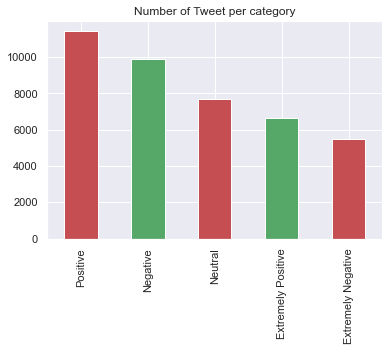

In [180]:
train['Sentiment'].value_counts().plot(kind="bar", color=['r', 'g'], title='Number of Tweet per category');

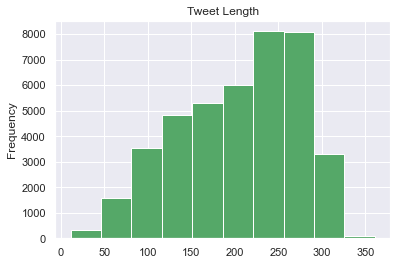

In [181]:
train['OriginalTweet'].str.len().plot(kind='hist', title='Tweet Length', color='g');

In [182]:
# train = train[train.Sentiment != 'Neutral']
# test = test[test.Sentiment != 'Neutral']

In [183]:
train['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [184]:
def rename(x):
    if x == "Extremely Positive":
        return 'positive'
    elif x == "Extremely Negative":
        return 'negative'
    elif x == "Positive":
        return 'positive'
    elif x == "Negative":
        return "negative"
    else:
        return 'normal'

tqdm.pandas(desc="Train sentiments column fixing")
train['Sentiment'] = train.Sentiment.progress_apply(rename)

tqdm.pandas(desc="Test sentiments column fixing")
test['Sentiment'] = test.Sentiment.progress_apply(rename)

Test sentiments column fixing: 100%|██████████| 3798/3798 [00:00<00:00, 348036.24it/s]


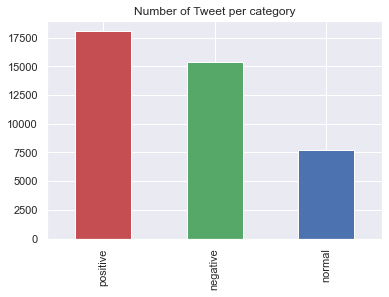

In [185]:
train['Sentiment'].value_counts().plot(kind="bar", color=['r', 'g', 'b'], title='Number of Tweet per category');

### Lemmitization

In [187]:
# Performing Lemmitization
spacy_ = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def lemmatizing(word):
    doc = spacy_(word)
    doc = list(word.lemma_ for word in doc if word.is_alpha and not word.is_stop)
    return ' '.join(doc).lower()
    

tqdm.pandas(desc="Lemmitizing Trian df")
train['ModifiedTweets'] = train.OriginalTweet.progress_apply(lemmatizing)

tqdm.pandas(desc="Lemmitizing Test df")
test['ModifiedTweets'] = test.OriginalTweet.progress_apply(lemmatizing)

Lemmitizing Test df: 100%|██████████| 3798/3798 [00:33<00:00, 114.53it/s]


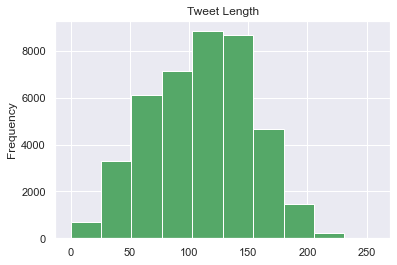

In [188]:
train['ModifiedTweets'].str.len().plot(kind='hist', title='Tweet Length', color='g');

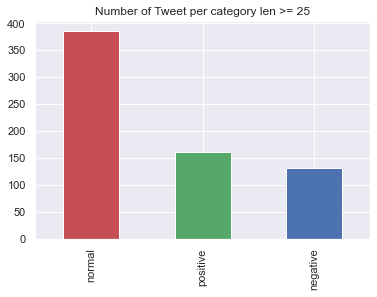

In [189]:
len_tweet = train[train['ModifiedTweets'].str.len() <= 25]

len_tweet['Sentiment'].value_counts().plot(kind="bar", 
                              color=['r', 'g', 'b'], 
                              title='Number of Tweet per category len >= 25');

In [190]:
train = train[train['ModifiedTweets'].str.len() >= 25]

In [192]:

train.drop("OriginalTweet", axis=1).to_csv(DATA_DIR/"train_procesed.csv", index=False)
test.drop("OriginalTweet", axis=1).to_csv(DATA_DIR/"test_processed.csv", index=False)

In [10]:
train_df = pd.read_csv(DATA_DIR/"train_procesed.csv")
test_df = pd.read_csv(DATA_DIR/"test_processed.csv")

In [12]:
test_df.head(4)

,Sentiment,ModifiedTweets
0,negative,trending new yorkers encounter supermarket she...
1,positive,find hand sanitizer fred meyer turn amazon pac...
2,positive,find protect love one coronavirus
3,negative,panic buying hit newyork city anxious shopper ...


In [13]:
train_df.head(4)

,Sentiment,ModifiedTweets
0,positive,advice talk neighbours family exchange phone n...
1,positive,coronavirus australia woolworth elderly disabl...
2,positive,food stock panic food need stay calm stay safe...
3,negative,ready supermarket outbreak paranoid food stock...


In [18]:
train_df.ModifiedTweets[2839]

'past week absolute nightmare ask work grocery store let tell people asshole grocery store nice people work put life risk coronavirus'